# Attention with hidden state vectors and batching

In [610]:
import torch

In [611]:
seq_len = 4
hidden_dim = 2
q_dim = 1
attention_dim = 2
batch_size = 5

Create simulated input

In [612]:
x = torch.randn(batch_size, seq_len, hidden_dim)
print(x.shape)
x

torch.Size([5, 4, 2])


tensor([[[-0.4868, -0.1493],
         [ 1.0017, -0.7029],
         [-1.3288,  1.1382],
         [-0.7695, -1.2680]],

        [[ 0.0216, -0.3404],
         [ 0.4157,  0.8014],
         [ 1.4950,  0.4803],
         [-0.1161,  0.2666]],

        [[-1.0551, -1.5150],
         [-0.9041,  0.4531],
         [ 0.3374, -1.2191],
         [ 1.9478, -0.3364]],

        [[-0.1688,  2.3537],
         [ 1.0013,  1.3729],
         [ 0.2234,  0.0793],
         [ 0.4566,  1.0247]],

        [[ 0.1285, -0.7833],
         [-0.6731, -0.5376],
         [-1.3756, -0.8214],
         [ 0.9414,  0.7949]]])

In [613]:
x = x.unsqueeze(1)
x = x.repeat(1, seq_len, 1, 1)
print(x.shape)

torch.Size([5, 4, 4, 2])


Create a mask to mask out future hidden states.

In [614]:
mask = torch.triu(torch.ones(x.shape[-1], x.shape[1], x.shape[1]))
mask = mask.repeat(x.shape[0], 1, 1, 1)
print(mask.shape)
mask

torch.Size([5, 2, 4, 4])


tensor([[[[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]],

         [[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]]],


        [[[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]],

         [[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]]],


        [[[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]],

         [[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]]],


        [[[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]],

         [[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1.],
          [0., 0., 0., 1.]]],


        [[[1., 1., 1., 1.],
          [0., 1., 1., 1.],
          [0., 0., 1., 1

In [615]:
masked = torch.mul(mask, x.transpose(1, -1))
print(masked.shape)
masked.transpose(0, -1)

torch.Size([5, 2, 4, 4])


tensor([[[[-0.4868,  0.0216, -1.0551, -0.1688,  0.1285],
          [ 0.0000,  0.0000, -0.0000,  0.0000, -0.0000],
          [-0.0000,  0.0000,  0.0000,  0.0000, -0.0000],
          [-0.0000, -0.0000,  0.0000,  0.0000,  0.0000]],

         [[-0.1493, -0.3404, -1.5150,  2.3537, -0.7833],
          [-0.0000,  0.0000,  0.0000,  0.0000, -0.0000],
          [ 0.0000,  0.0000, -0.0000,  0.0000, -0.0000],
          [-0.0000,  0.0000, -0.0000,  0.0000,  0.0000]]],


        [[[-0.4868,  0.0216, -1.0551, -0.1688,  0.1285],
          [ 1.0017,  0.4157, -0.9041,  1.0013, -0.6731],
          [-0.0000,  0.0000,  0.0000,  0.0000, -0.0000],
          [-0.0000, -0.0000,  0.0000,  0.0000,  0.0000]],

         [[-0.1493, -0.3404, -1.5150,  2.3537, -0.7833],
          [-0.7029,  0.8014,  0.4531,  1.3729, -0.5376],
          [ 0.0000,  0.0000, -0.0000,  0.0000, -0.0000],
          [-0.0000,  0.0000, -0.0000,  0.0000,  0.0000]]],


        [[[-0.4868,  0.0216, -1.0551, -0.1688,  0.1285],
          [ 1.0017,

In [616]:
w_a = torch.randn(hidden_dim, attention_dim)
tanh = torch.nn.Tanh()
key = tanh(torch.matmul(masked.transpose(1, -1), w_a))
print(key.shape)
key

torch.Size([5, 4, 4, 2])


tensor([[[[ 0.7213,  0.2364],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[ 0.7213,  0.2364],
          [-0.7695,  0.6868],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[ 0.7213,  0.2364],
          [-0.7695,  0.6868],
          [ 0.8268, -0.8830],
          [ 0.0000,  0.0000]],

         [[ 0.7213,  0.2364],
          [-0.7695,  0.6868],
          [ 0.8268, -0.8830],
          [ 0.9806,  0.9411]]],


        [[[ 0.2478,  0.4209],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[ 0.2478,  0.4209],
          [-0.8734, -0.7998],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[ 0.2478,  0.4209],
          [-0.8734, -0.7998],
          [-0.9928, -0.6462],
          [ 0.0000,  0.0000]],

         [[ 0.2478,  0.4209],
          [-0.8734, -0.7998],
          [-0.9928, -0.6462],
          [-0.0383, -0.3298]]],


        [[[ 0.9949, 

In [617]:
softmax = torch.nn.Softmax(dim=-1)
q = torch.randn(q_dim, attention_dim)
temp = torch.matmul(q, key.transpose(-2, -1))
print(temp.shape)
temp

torch.Size([5, 4, 1, 4])


tensor([[[[ 0.4482,  0.0000,  0.0000,  0.0000]],

         [[ 0.4482,  0.3958,  0.0000,  0.0000]],

         [[ 0.4482,  0.3958, -0.5604,  0.0000]],

         [[ 0.4482,  0.3958, -0.5604,  1.1862]]],


        [[[ 0.4702,  0.0000,  0.0000,  0.0000]],

         [[ 0.4702, -1.0208,  0.0000,  0.0000]],

         [[ 0.4702, -1.0208, -0.9156,  0.0000]],

         [[ 0.4702, -1.0208, -0.9156, -0.3192]]],


        [[[ 1.2181,  0.0000,  0.0000,  0.0000]],

         [[ 1.2181, -0.1942,  0.0000,  0.0000]],

         [[ 1.2181, -0.1942,  0.9987,  0.0000]],

         [[ 1.2181, -0.1942,  0.9987, -0.0667]]],


        [[[-1.2237,  0.0000,  0.0000,  0.0000]],

         [[-1.2237, -1.2046,  0.0000,  0.0000]],

         [[-1.2237, -1.2046, -0.2430,  0.0000]],

         [[-1.2237, -1.2046, -0.2430, -1.1153]]],


        [[[ 0.8536,  0.0000,  0.0000,  0.0000]],

         [[ 0.8536,  0.8915,  0.0000,  0.0000]],

         [[ 0.8536,  0.8915,  1.0932,  0.0000]],

         [[ 0.8536,  0.8915,  1.0932, -1.0

Create a mask to not calculcate softmax over zero padding.

In [618]:
softmax_mask = ((torch.tril(torch.ones(temp.shape[1], temp.shape[1]), diagonal=0) != 1) * -float('inf')).nan_to_num(nan=0)
softmax_mask = softmax_mask.unsqueeze(1)
print(softmax_mask.shape)
softmax_mask

torch.Size([4, 1, 4])


tensor([[[ 0.0000e+00, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00, -3.4028e+38, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [619]:
temp = temp + softmax_mask
temp

tensor([[[[ 4.4824e-01, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

         [[ 4.4824e-01,  3.9582e-01, -3.4028e+38, -3.4028e+38]],

         [[ 4.4824e-01,  3.9582e-01, -5.6035e-01, -3.4028e+38]],

         [[ 4.4824e-01,  3.9582e-01, -5.6035e-01,  1.1862e+00]]],


        [[[ 4.7017e-01, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

         [[ 4.7017e-01, -1.0208e+00, -3.4028e+38, -3.4028e+38]],

         [[ 4.7017e-01, -1.0208e+00, -9.1559e-01, -3.4028e+38]],

         [[ 4.7017e-01, -1.0208e+00, -9.1559e-01, -3.1917e-01]]],


        [[[ 1.2181e+00, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

         [[ 1.2181e+00, -1.9424e-01, -3.4028e+38, -3.4028e+38]],

         [[ 1.2181e+00, -1.9424e-01,  9.9870e-01, -3.4028e+38]],

         [[ 1.2181e+00, -1.9424e-01,  9.9870e-01, -6.6673e-02]]],


        [[[-1.2237e+00, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

         [[-1.2237e+00, -1.2046e+00, -3.4028e+38, -3.4028e+38]],

         [[-1.2237e+00, -1.2046e+00, -2.4296e-01, -3.4028e+38]],

    

In [620]:
d = softmax(temp)
print(d.shape)

torch.Size([5, 4, 1, 4])


Plot results, averaging over batch and q.

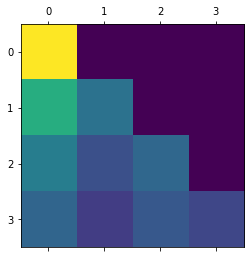

In [621]:
import matplotlib.pyplot as plt
plt.matshow(d.mean(dim=0).mean(dim=1)) # Average over batch and q
plt.show()

Final weighted sum with dimension batch x sequence length x q dim x hidden dim

In [622]:
print(d.shape)
print(masked.shape)
a = torch.matmul(d, masked.transpose(1, -1))
print(a.shape)
a.squeeze()

torch.Size([5, 4, 1, 4])
torch.Size([5, 2, 4, 4])
torch.Size([5, 4, 1, 2])


tensor([[[-0.4868, -0.1493],
         [ 0.2380, -0.4189],
         [-0.0090, -0.1734],
         [-0.3701, -0.6931]],

        [[ 0.0216, -0.3404],
         [ 0.0940, -0.1305],
         [ 0.3315, -0.0270],
         [ 0.2262,  0.0421]],

        [[-1.0551, -1.5150],
         [-1.0255, -1.1295],
         [-0.4907, -1.1647],
         [-0.2003, -1.0660]],

        [[-0.1688,  2.3537],
         [ 0.4219,  1.8586],
         [ 0.3090,  0.8460],
         [ 0.3373,  0.8804]],

        [[ 0.1285, -0.7833],
         [-0.2799, -0.6581],
         [-0.7006, -0.7208],
         [-0.6309, -0.6565]]])